# Solutions/hints to exercises

In [1]:
import numpy as np

# plots
import matplotlib.pyplot as plt

# display imported graphics
from IPython.display import display, Image

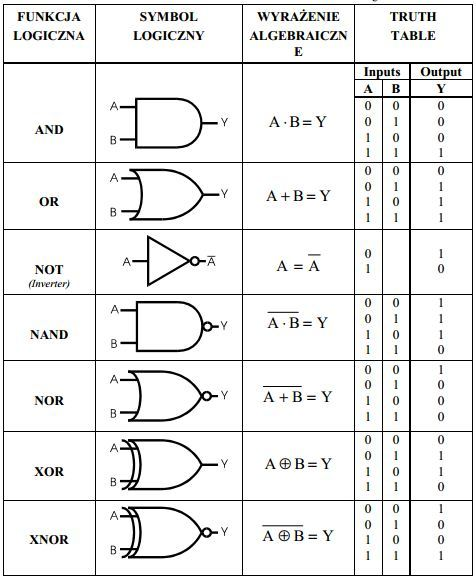

In [2]:
Image(filename="images/sym_bl.jpg",width=500)

In [3]:
# copied from the lecture code

def step(s): # step function
     if s > 0:
        return 1
     else:
        return 0

def f(s): # activation function = step function
    return step(s)

def neuron(x,w):
    """
    MCP neuron

    x: array of inputs  [x1, x2,...,xn]
    w: array of weights [w0, w1, w2,...,wn]
    
    return: signal=weighted sum w0 + x1 w1 + x2 w2 +...+ xn wn = x.w
    """ 
    return f(np.dot(np.insert(x,0,1),w)) # insert x0=1, evaluate s=x.w, obtain the response f(s)

def neurAND(p,q): return neuron([p,q],[-1,.6,.6])
def neurNAND(p,q): return neuron([p,q],[1,-0.6,-0.6])
def neurOR(p,q):   return neuron([p,q],[-1,1.2,1.2])
def neurXOR(p,q): return neurAND(neurNAND(p,q),neurOR(p,q))

In [4]:
def neurNOT(i):
    return neuron([i],[1,-1.2])

In [5]:
for i in [0,1]: 
    print(i,"",neurNOT(i))

0  1
1  0


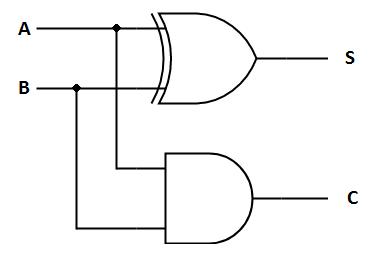

In [6]:
# images from the above link

Image(filename="images/Half-adder.png",width=270)

In [7]:
def sum_half(A,B):
    S=neurXOR(A,B)
    C=neurAND(A,B)
    return[S,C]

In [8]:
for i in [0,1]: 
    for j in [0,1]: 
        print(i,j,sum_half(i,j))

0 0 [0, 0]
0 1 [1, 0]
1 0 [1, 0]
1 1 [0, 1]


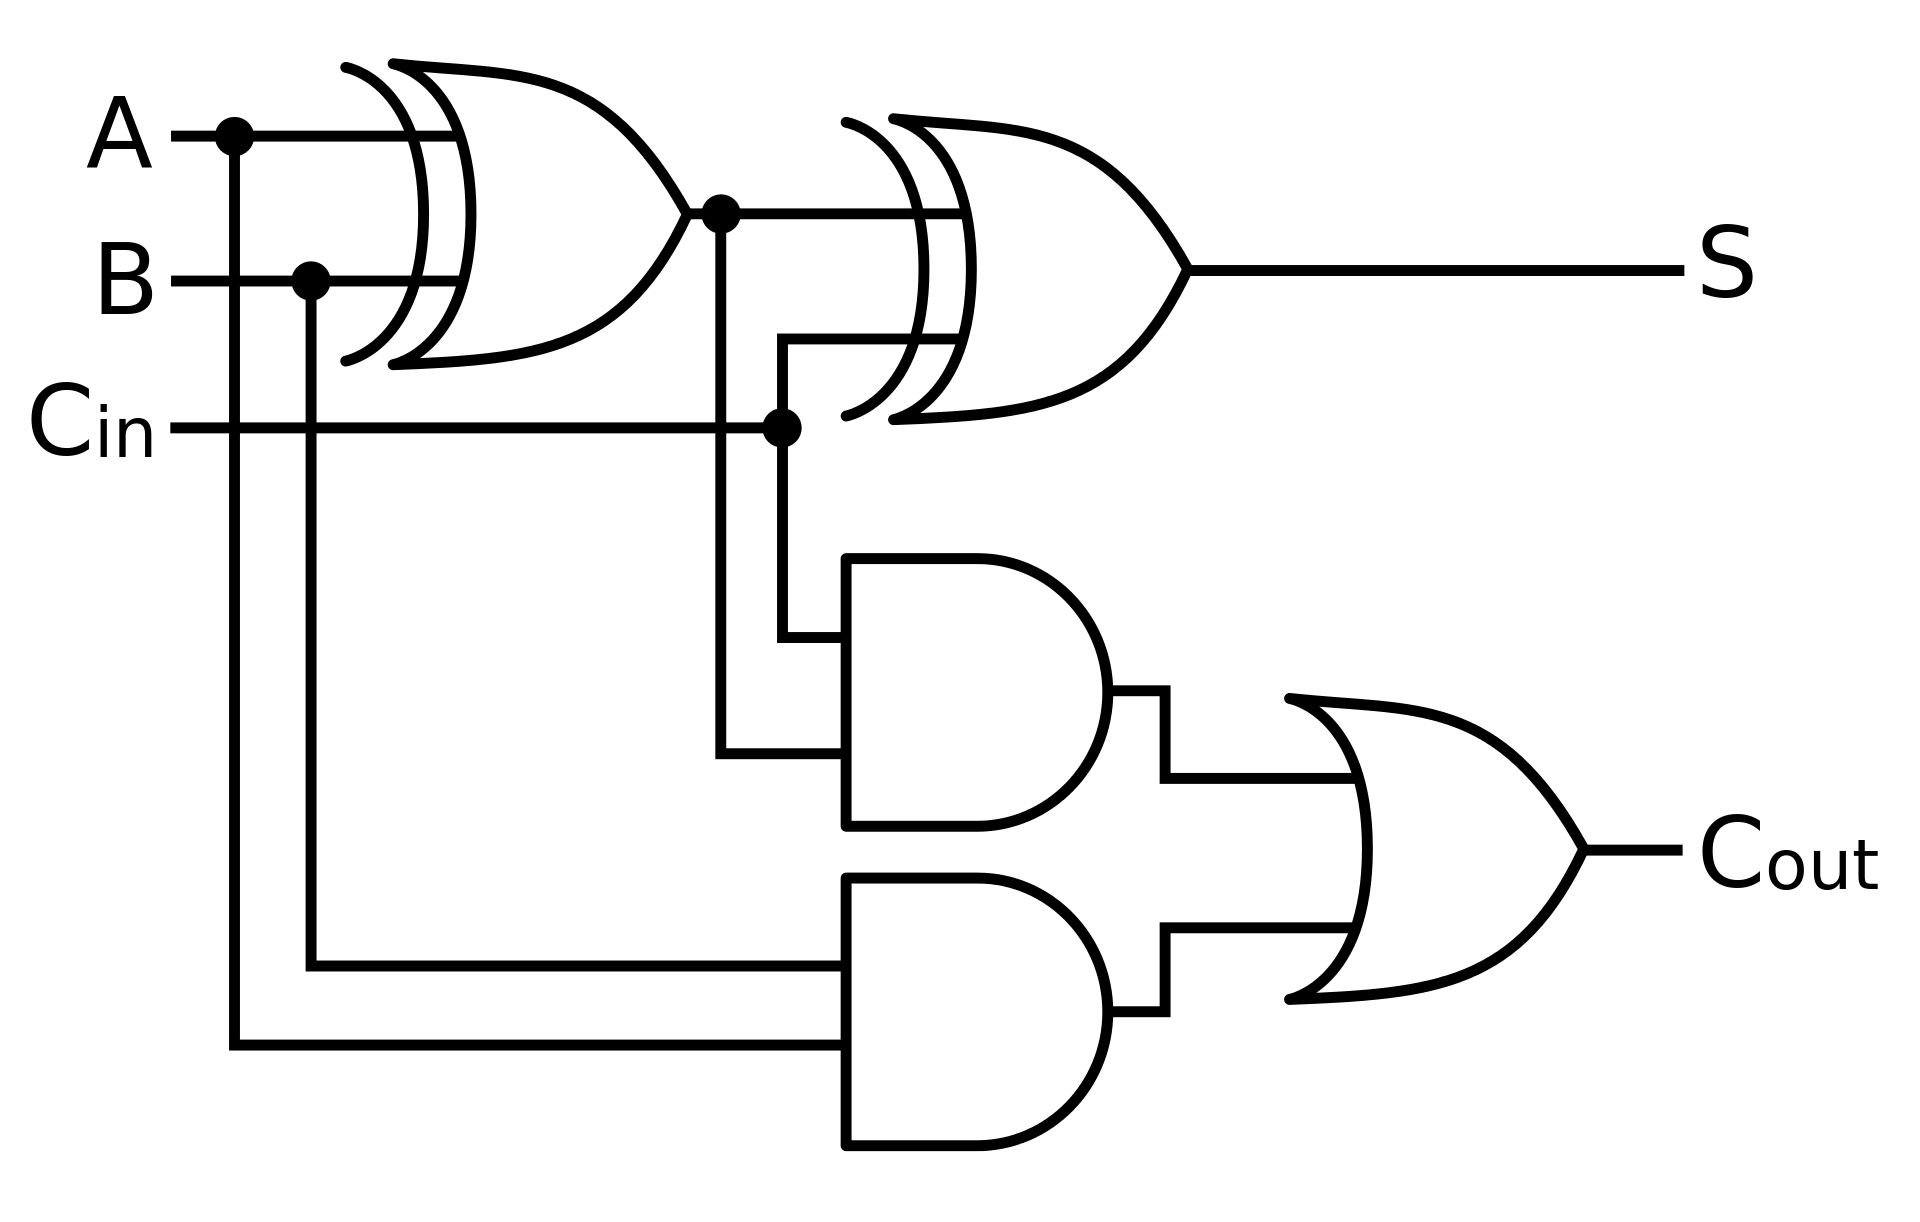

In [9]:
Image(filename="images/Full-adder.png",width=320)

In [10]:
def sum_full(A,B,Cin):
    S=neurXOR(neurXOR(A,B),Cin)
    Cout=neurOR(neurAND(neurXOR(A,B),Cin),neurAND(A,B))
    return[S,Cout]

In [11]:
for i in [0,1]: 
    for j in [0,1]: 
        for k in [0,1]:
            print(i,j,k,sum_full(i,j,k))

0 0 0 [0, 0]
0 0 1 [1, 0]
0 1 0 [1, 0]
0 1 1 [0, 1]
1 0 0 [1, 0]
1 0 1 [0, 1]
1 1 0 [0, 1]
1 1 1 [1, 1]


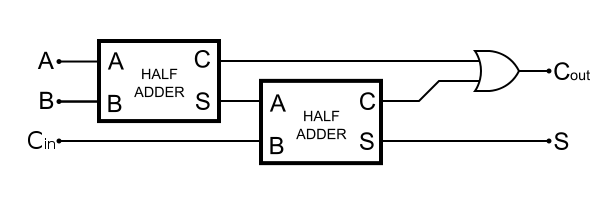

In [12]:
Image(filename="images/2_Half_Adder.png",width=500)

In [13]:
def sum_full_2(A,B,Cin):
    [S1,C1]=sum_half(A,B)  
    [S2,C2]=sum_half(S1,Cin)
    return [S2,neurOR(C1,C2)]

In [14]:
for i in [0,1]: 
    for j in [0,1]: 
        for k in [0,1]:
            print(i,j,k,sum_full_2(i,j,k))

0 0 0 [0, 0]
0 0 1 [1, 0]
0 1 0 [1, 0]
0 1 1 [0, 1]
1 0 0 [1, 0]
1 0 1 [0, 1]
1 1 0 [0, 1]
1 1 1 [1, 1]
